In [1]:
aa = read.csv("data/data.csv")
dim(aa)
head(aa)

[1] 78 13

X,benign1,benign2,benign3,benign4,benign5,benign6,benign7,malignant1,malignant2,malignant3,malignant4,malignant5
A2,0.16,0.21,0.25,0.28,0.46,0.17,0.30,0.096,0.14,0.38,0.24,0.22
A2[6]BG(4)1S(6)1,0.19,0.45,0.81,0.16,0.22,0.24,0.44,0.599,0.51,0.29,0.19,0.14
A3,0.80,0.85,1.29,0.35,0.87,0.47,1.12,0.539,0.62,0.51,0.88,0.59
"A3F(3)1G(4)3S(3,3)2",0.19,0.64,0.31,NA,0.21,0.28,NA,0.424,0.30,0.36,0.32,NA
"A3G(4)3S(3,6)2",0.27,0.64,0.20,0.50,0.16,0.30,0.21,0.344,0.37,0.32,0.28,0.23
"A3G(4)3S(3,6,6)3",1.49,1.00,1.19,NA,0.66,1.05,1.72,0.757,1.09,1.53,1.24,0.52


In [2]:
# divide into 2 datasets
a1 = aa[-grep("Glycans", aa$X), ]
a2 = aa[grep("Glycans", aa$X), ]
dim(a1)
dim(a2)

[1] 66 13

[1] 12 13

In [3]:
# transform into matrix

g1 = as.matrix(a1[,-1])
rownames(g1) = a1$X
g2 = as.matrix(a2[,-1])
rownames(g2) = a2$X
dim(g1)
dim(g2)

[1] 66 12

[1] 12 12

In [37]:
# t-test with p adjustment

print("dataset 1, 66 features")
group = c(rep("B", 7), rep("M", 5))
pv1 = apply(g1, 1, function(x){t.test(x ~ group)$p.value})
bh = p.adjust(pv1, method = "BH")
bonf = p.adjust(pv1, method = "bonferroni")
head(cbind(pv1, bh, bonf)[order(pv1), ])

print("dataset 2, 12 grouped features")
pv2 = apply(g2, 1, function(x){t.test(x ~ group)$p.value})
bh = p.adjust(pv2, method = "BH")
bonf = p.adjust(pv2, method = "bonferroni")
head(cbind(pv2, bh, bonf)[order(pv2), ])

[1] "dataset 1, 66 features"


,pv1,bh,bonf
"M9 a3D3,a2D4(2)",0.003602182,0.2377440,0.237744
A2BG(4)2,0.073382422,0.9924175,1.000000
A4G4S3 / FA3BG3S2Sg1b,0.118557274,0.9924175,1.000000
FA2BG2S2,0.148138280,0.9924175,1.000000
A3,0.205083842,0.9924175,1.000000
A4G4S2,0.214773445,0.9924175,1.000000


[1] "dataset 2, 12 grouped features"


,pv2,bh,bonf
Antennary 2 Glycans,0.04287878,0.5145454,0.5145454
Antennary 1 Glycans,0.27818358,0.9147541,1.0000000
Bisecting Glycans,0.31149749,0.9147541,1.0000000
High Mannose Glycans,0.43132358,0.9147541,1.0000000
Antennary 3 Glycans,0.68985020,0.9147541,1.0000000
De-Fucosylated Glycans,0.70041403,0.9147541,1.0000000


In [5]:
# impute NA values

library(impute)
set.seed(100)
p2 = impute.knn(g2)$data
g2[c(6,12), ]
p2[c(6,12), ]

,benign1,benign2,benign3,benign4,benign5,benign6,benign7,malignant1,malignant2,malignant3,malignant4,malignant5
De-Fucosylated Glycans,48.29,NA,55.24,52.14,42.50,50.73,44.85,64.543,42.60,53.77,52.38,40.98
Tetra-Sialylated Glycans,NA,NA,0.88,0.76,0.17,NA,NA,0.859,0.86,0.46,NA,0.37


,benign1,benign2,benign3,benign4,benign5,benign6,benign7,malignant1,malignant2,malignant3,malignant4,malignant5
De-Fucosylated Glycans,48.290,20.41400,55.24,52.14,42.50,50.730,44.850,64.543,42.60,53.77,52.380,40.98
Tetra-Sialylated Glycans,17.913,14.39333,0.88,0.76,0.17,18.045,17.275,0.859,0.86,0.46,18.175,0.37


[1] -3.076424e-16  3.172918e-16

[1] 1 1

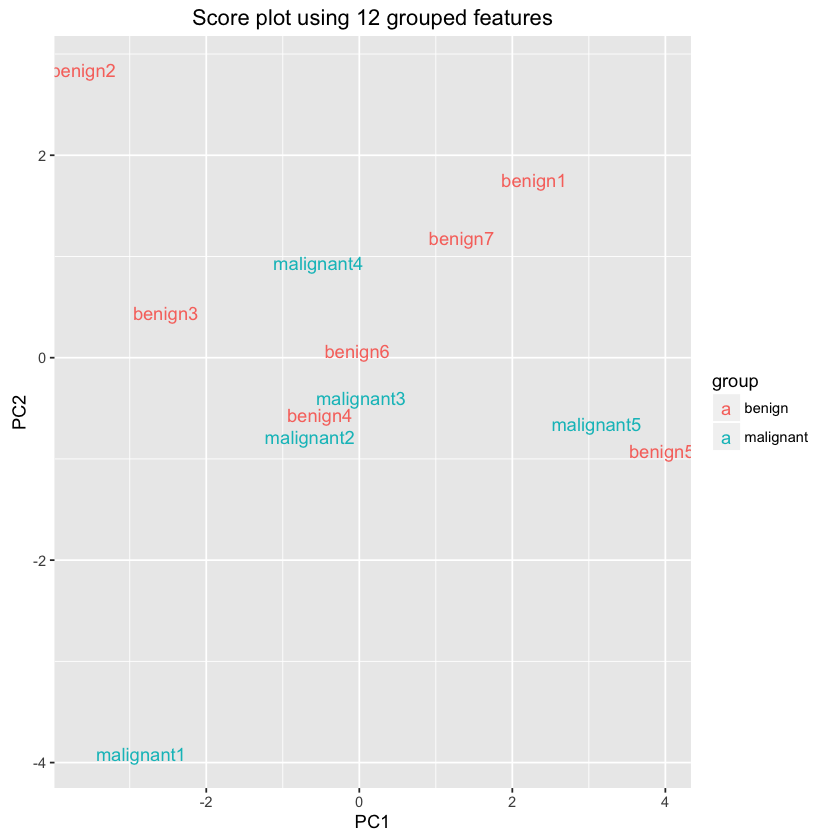

In [36]:
# scaling to 0 mean and 1 sd
data = scale(t(p2), center = T, scale = T)
range(apply(data, 2, mean))
range(apply(data, 2, sd))

# PCA score plot
# cannot do PCA on 66 features, sample size cannot be smaller than feature sizes
sc = princomp(data)$scores
sc = as.data.frame(sc)
sc$group = c(rep("benign", 7), rep("malignant", 5))

library(ggplot2)
p <- ggplot(sc, aes(Comp.1, Comp.2, label = rownames(sc), colour = group))
p + geom_text() + xlab("PC1") + ylab("PC2") + ggtitle("Score plot using 12 grouped features") 

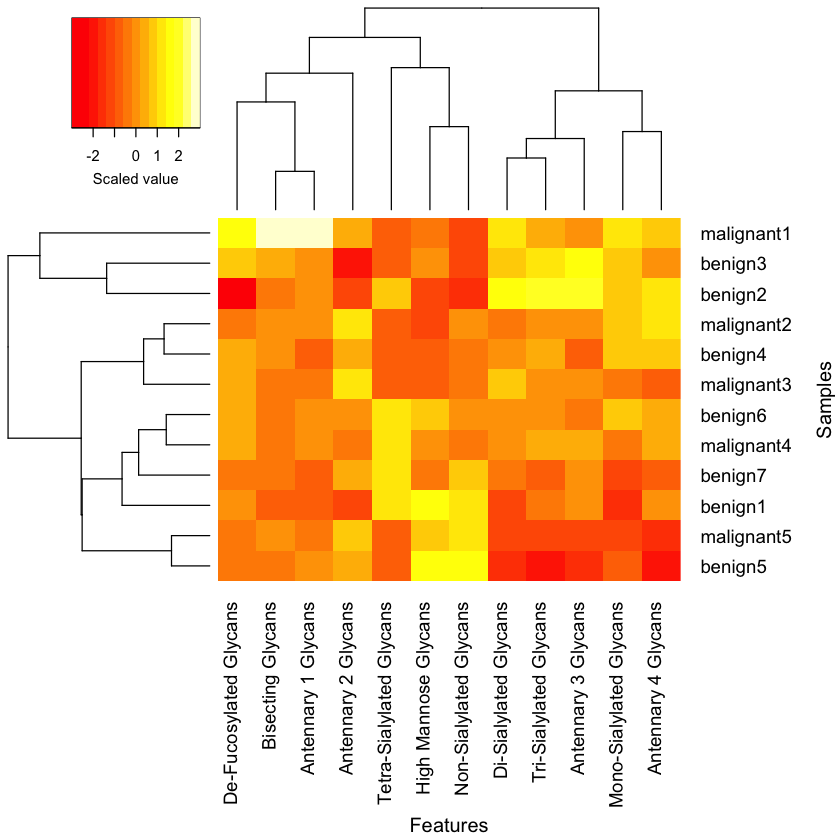

In [35]:
# heatmap

library(gplots)

heatmap.2(data,
Rowv=TRUE,
Colv=TRUE,
distfun = dist,
hclustfun = hclust,
key = TRUE,
keysize = 1.4,
trace="none",
density.info= "none",
key.title = NA,
key.xlab = "Scaled value",
key.ylab = NULL,
margins=c(13, 8),
xlab = "Features", ylab = "Samples")          